In [1]:
library(modelr)
library(tidyverse)
library(lubridate)
theme_set(theme_minimal())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### Review
Use the linear model to determine:
1. Expected price of a one-carat diamond with a good cut.
2. The average duration of an NYC flight in July.

### Review of `model_matrix`
We covered this command briefly two lectures ago. It's useful for understanding exactly how to interpret the regression output:

In [34]:
lm(hwy ~ cty + class, data=mpg) %>% summary


Call:
lm(formula = hwy ~ cty + class, data = mpg)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3702 -0.6638 -0.0358  0.5938  3.9438 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      8.19133    0.69631  11.764  < 2e-16 ***
cty              1.07848    0.02791  38.635  < 2e-16 ***
classcompact    -1.60084    0.59109  -2.708 0.007281 ** 
classmidsize    -1.12682    0.58772  -1.917 0.056465 .  
classminivan    -2.88737    0.66074  -4.370 1.90e-05 ***
classpickup     -5.33285    0.59161  -9.014  < 2e-16 ***
classsubcompact -2.01875    0.60181  -3.354 0.000932 ***
classsuv        -4.62185    0.57189  -8.082 3.84e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.225 on 226 degrees of freedom
Multiple R-squared:  0.959,	Adjusted R-squared:  0.9577 
F-statistic: 754.4 on 7 and 226 DF,  p-value: < 2.2e-16


In [35]:
model_matrix(hwy ~ cty + class, data=mpg)

(Intercept),cty,classcompact,classmidsize,classminivan,classpickup,classsubcompact,classsuv
1,18,1,0,0,0,0,0
1,21,1,0,0,0,0,0
1,20,1,0,0,0,0,0
1,21,1,0,0,0,0,0
1,16,1,0,0,0,0,0
1,18,1,0,0,0,0,0
1,18,1,0,0,0,0,0
1,18,1,0,0,0,0,0
1,16,1,0,0,0,0,0
1,20,1,0,0,0,0,0


In [29]:
diamonds %>% print

# A tibble: 53,940 x 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1 0.23  Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2 0.21  Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3 0.23  Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4 0.290 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5 0.31  Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6 0.24  Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7 0.24  Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8 0.26  Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9 0.22  Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10 0.23  Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


# Lecture 21: Building models for `gapminder`
The `gapminder` package contains data from [Gapminder](https://www.gapminder.org/), which was popularised by Swedish statistician Hans Rosling. If you don't know about this data or this person, take five minutes and [watch one of his videos](https://www.youtube.com/watch?v=jbkSRLYSojo) before coming to lecture.

In [7]:
library(gapminder)
gapminder %>% print

# A tibble: 1,704 x 6
   country     continent  year lifeExp      pop gdpPercap
   <fct>       <fct>     <int>   <dbl>    <int>     <dbl>
 1 Afghanistan Asia       1952    28.8  8425333      779.
 2 Afghanistan Asia       1957    30.3  9240934      821.
 3 Afghanistan Asia       1962    32.0 10267083      853.
 4 Afghanistan Asia       1967    34.0 11537966      836.
 5 Afghanistan Asia       1972    36.1 13079460      740.
 6 Afghanistan Asia       1977    38.4 14880372      786.
 7 Afghanistan Asia       1982    39.9 12881816      978.
 8 Afghanistan Asia       1987    40.8 13867957      852.
 9 Afghanistan Asia       1992    41.7 16317921      649.
10 Afghanistan Asia       1997    41.8 22227415      635.
# … with 1,694 more rows


To begin with we will focus on how life expectancy varies by year and by country.

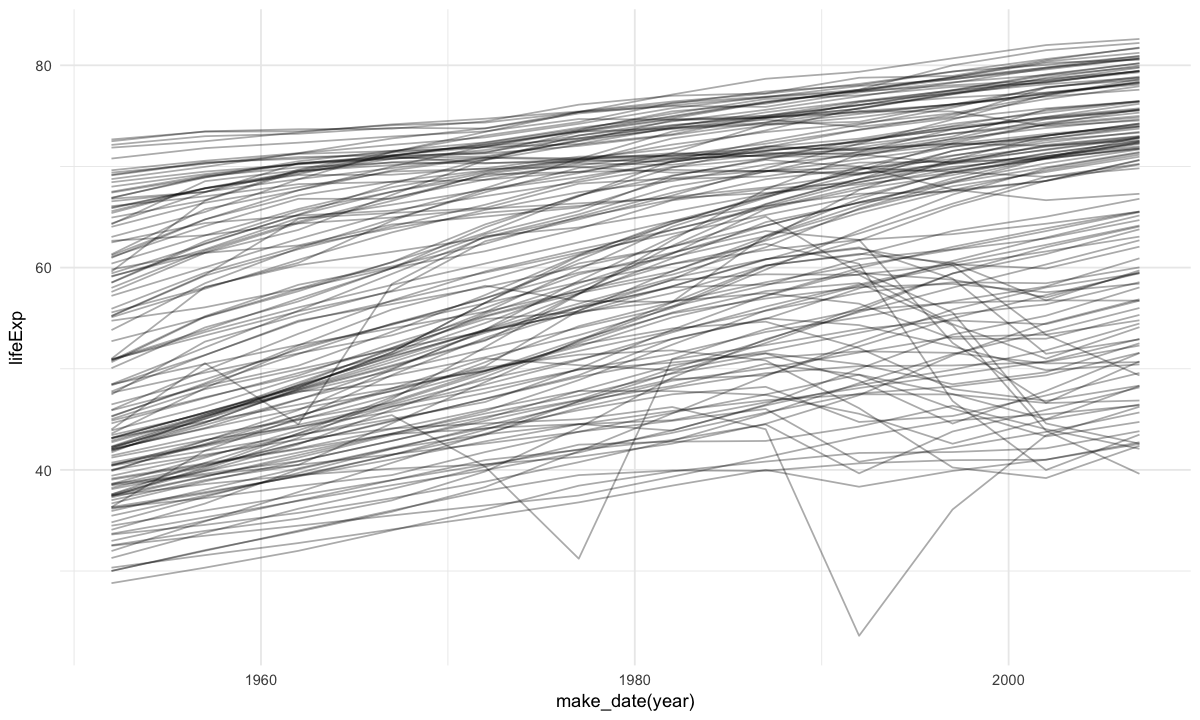

In [80]:
ggplot(gapminder, aes(x = make_date(year), y = lifeExp, group = country))  + 
    geom_line(alpha = 1/3) # + geom_smooth(method="lm")

The regression line shows that overall trend in life expectancy has been upwards over the last fifty years. That's good! But there are some obvious exceptions. To cast those into sharper relief, let's subtract the linear trend from each series.

The linear trend is a good fit most of the non-African and non-Asian countries. However, beginning in the 1990s, a number of African countries have lagged far behind the rest of the world in terms of life expectancy. This is reflected in the negative residuals show in blue on the lower-right portion of this graph.

## Interaction terms
To dig deeper we will want to fit a separate linear model to each country. We want our model to be:

$$\text{lifeExp}_{c}(\text{year}) = \alpha_c + \beta_c \cdot \text{year}.$$

Here $c$ indexes countries. To do this we will add an interaction term:

In [10]:
mdl <- lm(lifeExp ~ country * year, data=gapminder)

To understand what this does, let's turn to the model matrix:

In [13]:
gapminder[1,]
model_matrix(gapminder, lifeExp ~ country * year)[1,]

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453


(Intercept),countryAlbania,countryAlgeria,countryAngola,countryArgentina,countryAustralia,countryAustria,countryBahrain,countryBangladesh,countryBelgium,⋯,countryUganda:year,countryUnited Kingdom:year,countryUnited States:year,countryUruguay:year,countryVenezuela:year,countryVietnam:year,countryWest Bank and Gaza:year,"countryYemen, Rep.:year",countryZambia:year,countryZimbabwe:year
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


The interaction term creates a separate slope *and* intercept term for every country except one.

Now we can plot the residuals by country, as originally intended:

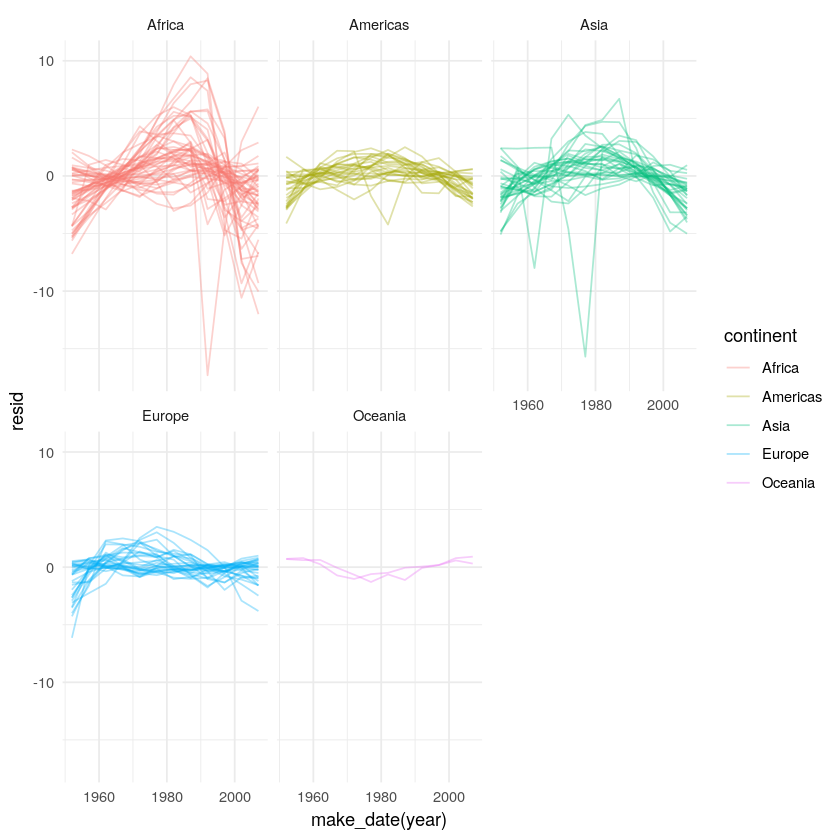

In [14]:
add_residuals(gapminder, mdl) %>% ggplot(aes(x = make_date(year), y = resid, 
                                             group = country, color=continent)) + 
    geom_line(alpha = 1/3)  + facet_wrap(~ continent)

## Measurements of model quality
So far we have looked at residuals to judge how well the models fit. There are other more general measurements of model quality. To help us look at these we will use the `broom` package for turning models into tidy data:

In [16]:
library(broom)

Warning message:
“package ‘broom’ was built under R version 3.4.4”
Attaching package: ‘broom’

The following object is masked from ‘package:modelr’:

    bootstrap



The `broom::glance()` function lets us quickly look at a model and judge how well it fits:

In [94]:
nz = gapminder %>% filter(country == "New Zealand")
nz_mod = lm(lifeExp ~ year, data = nz)
glance(nz_mod)

  r.squared adj.r.squared sigma     statistic p.value      df logLik   
1 0.9535846 0.9489431     0.8043472 205.4459  5.407324e-08 2  -13.32064
  AIC      BIC    deviance df.residual
1 32.64128 34.096 6.469743 10         

`glance` prints out some technical measurements of how well the model fits. The basic one is `r.squared`. In the simple linear model this simply measures the square of the correlation between the predictions $\hat{\mathbf{y}}$ and the observations $\mathbf{y}$:

In [95]:
nz %>% add_predictions(nz_mod) %>% summarize(r2 = cor(lifeExp, pred) ** 2)

  r2       
1 0.9535846

To investigate each country individually, we are going to want to fit a linear model separately. For that we'll use a new command called `nest()`. The purpose of `nest()` is to package up our data frame into a bunch of nested data frames:

In [15]:
by_country = gapminder %>% group_by(country, continent) %>% nest %>% print

# A tibble: 142 x 3
   country     continent data             
   <fct>       <fct>     <list>           
 1 Afghanistan Asia      <tibble [12 × 4]>
 2 Albania     Europe    <tibble [12 × 4]>
 3 Algeria     Africa    <tibble [12 × 4]>
 4 Angola      Africa    <tibble [12 × 4]>
 5 Argentina   Americas  <tibble [12 × 4]>
 6 Australia   Oceania   <tibble [12 × 4]>
 7 Austria     Europe    <tibble [12 × 4]>
 8 Bahrain     Asia      <tibble [12 × 4]>
 9 Bangladesh  Asia      <tibble [12 × 4]>
10 Belgium     Europe    <tibble [12 × 4]>
# … with 132 more rows


### Exercise
Use `map()` to run a regression of life expectancy over time for *each* of the 142 countries in this data set. Store the results in a column called `model`.

In [17]:
# Your code here

Using the commands we have learned so far, we can apply the glance function to each model in `by_country` in order to extract the $R^2$:

In [102]:
gl = by_country %>% mutate(glance = map(model, glance)) %>% 
                    unnest(glance, .drop = T) %>% arrange(r.squared) %>% print

# A tibble: 142 x 13
   country      continent r.squared adj.r.squared sigma statistic p.value    df
   <fct>        <fct>         <dbl>         <dbl> <dbl>     <dbl>   <dbl> <int>
 1 Rwanda       Africa       0.0172      -0.0811   6.56     0.175  0.685      2
 2 Botswana     Africa       0.0340      -0.0626   6.11     0.352  0.566      2
 3 Zimbabwe     Africa       0.0562      -0.0381   7.21     0.596  0.458      2
 4 Zambia       Africa       0.0598      -0.0342   4.53     0.636  0.444      2
 5 Swaziland    Africa       0.0682      -0.0250   6.64     0.732  0.412      2
 6 Lesotho      Africa       0.0849      -0.00666  5.93     0.927  0.358      2
 7 Cote d'Ivoi… Africa       0.283        0.212    3.93     3.95   0.0748     2
 8 South Africa Africa       0.312        0.244    4.74     4.54   0.0588     2
 9 Uganda       Africa       0.342        0.276    3.19     5.20   0.0457     2
10 Congo, Dem.… Africa       0.348        0.283    2.43     5.34   0.0434     2
# ... with 132 more

Plotting the resulting data, we see that most countries are fit pretty well by the linear model. But some countries, especially those in Africa, have a very bad fit:

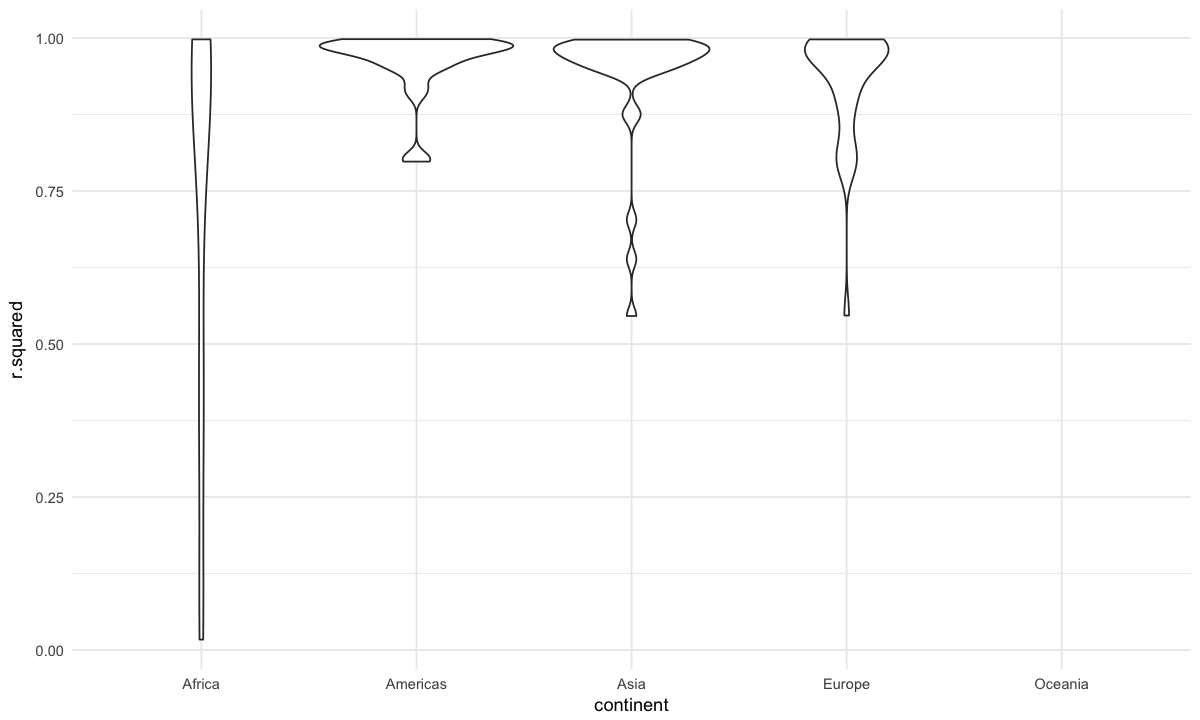

In [105]:
ggplot(gl, aes(x = continent, y = r.squared)) + geom_violin()

Let's extract those for further analysis:

Joining, by = c("country", "continent")


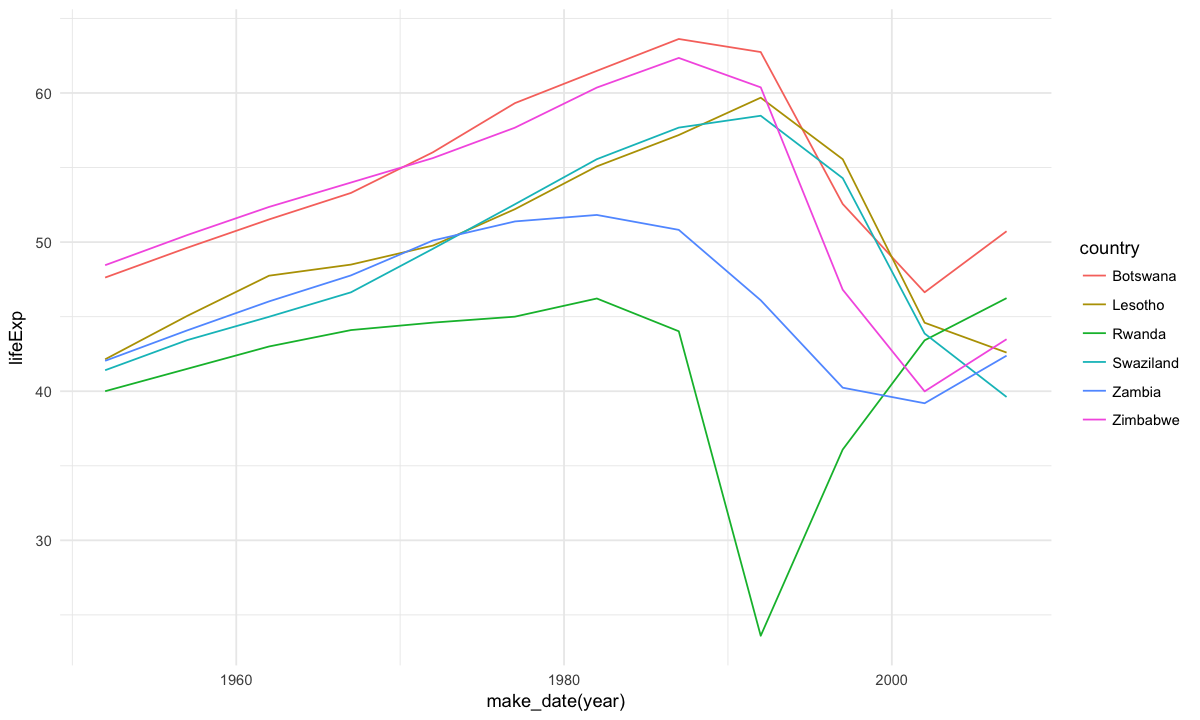

In [21]:
bad_fit = filter(gl, r.squared < 0.25)
gapminder %>% semi_join(bad_fit) %>% 
    ggplot(aes(make_date(year), lifeExp, color = country)) +
    geom_line()

There was a strong upward trend in life expectancy for 1950 to 1980 in these countries. Tragically, it was cut short in the 1990s. There are two reasons for this: the HIV/AIDS epidemic, and the Rwandan genocide.

This graph is really powerful. We can use the data to help us imagine what life would be like in these countries if not for these events:

### Exercise
For each of the countries in the graphic, use the linear model to *extrapolate* what the life expectancy would have been if it had followed the trend that was present from 1960 to 1980. 
- (Beginner) What would the life expectancy in Zimbabwe in 2000 have been?
- (Advanced) Plot the alternative life expectancy.

## Drops in life expectancy
The preceding graph motivates the question: which countries experienced the sharpest five-year drops in life expectancy? Can we explain why these occurred?

In [24]:
dlife = gapminder %>% arrange(country, year) %>% group_by(country) %>% 
                      mutate(dlife = c(NA, diff(lifeExp))) %>% arrange(dlife) %>% 
                      mutate(cy = str_c(country, ", ", year)) %>% ungroup
mdlife = mean(dlife$dlife, na.rm = T)

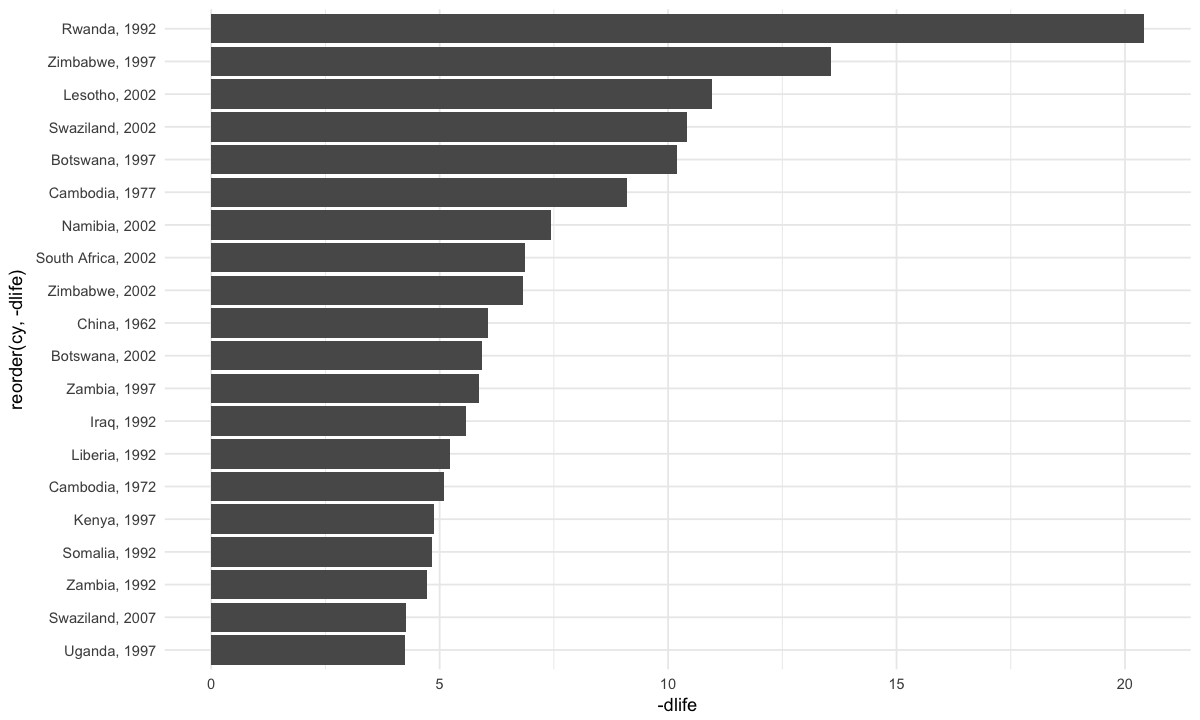

In [25]:
dlife %>% top_n(20, -dlife) %>% ggplot(aes(x = reorder(cy, -dlife), y = -dlife)) + geom_col() + coord_flip()

In most cases these drops in life expectancy appear to be due to the HIV/AIDS epidemic that ravaged sub-Saharan Africa in the late 1990s. To investigate this phenomenon further we will look at an [additional Gapminder data source](https://www.gapminder.org/data/) on the HIV infection rates.

## Reading Microsoft Excel files
The particular data we are interested in come are distributed as a Microsoft Excel spreadsheet. A lot of socio-economic data are distributed in this way, so this gives us a good chance to practice importing Excel data into R. 

<small>(This is probably the only time I will ever say something to the effect of "luckily, the data are in Excel format".)</small>

`tidyverse` conveniently gives us a `readxl` library for importing Excel data into R:

In [112]:
library(readxl)
hiv = readxl::read_xlsx("indicator hiv estimated prevalence% 15-49.xlsx") %>% print

# A tibble: 275 x 34
   `Estimated HIV Preval… `1979.0` `1980.0` `1981.0` `1982.0` `1983.0` `1984.0`
   <chr>                     <dbl>    <dbl>    <dbl>    <dbl>    <dbl>    <dbl>
 1 Abkhazia                NA            NA       NA       NA       NA       NA
 2 Afghanistan             NA            NA       NA       NA       NA       NA
 3 Akrotiri and Dhekelia   NA            NA       NA       NA       NA       NA
 4 Albania                 NA            NA       NA       NA       NA       NA
 5 Algeria                 NA            NA       NA       NA       NA       NA
 6 American Samoa          NA            NA       NA       NA       NA       NA
 7 Andorra                 NA            NA       NA       NA       NA       NA
 8 Angola                   0.0265       NA       NA       NA       NA       NA
 9 Anguilla                NA            NA       NA       NA       NA       NA
10 Antigua and Barbuda     NA            NA       NA       NA       NA       NA
# ... with 265 more

### Exercise
These data are untidy. `gather` them into a tidy format suitable for analysis.

To gain further insight, we can join the HIV data to our other gapminder data. Let us study further the relationship between HIV rate and life expectancy.

Joining, by = c("country", "year")
Warning message:
“Column `country` joining factor and character vector, coercing into character vector”Warning message:
“Removed 1222 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1222 rows containing missing values (geom_point).”

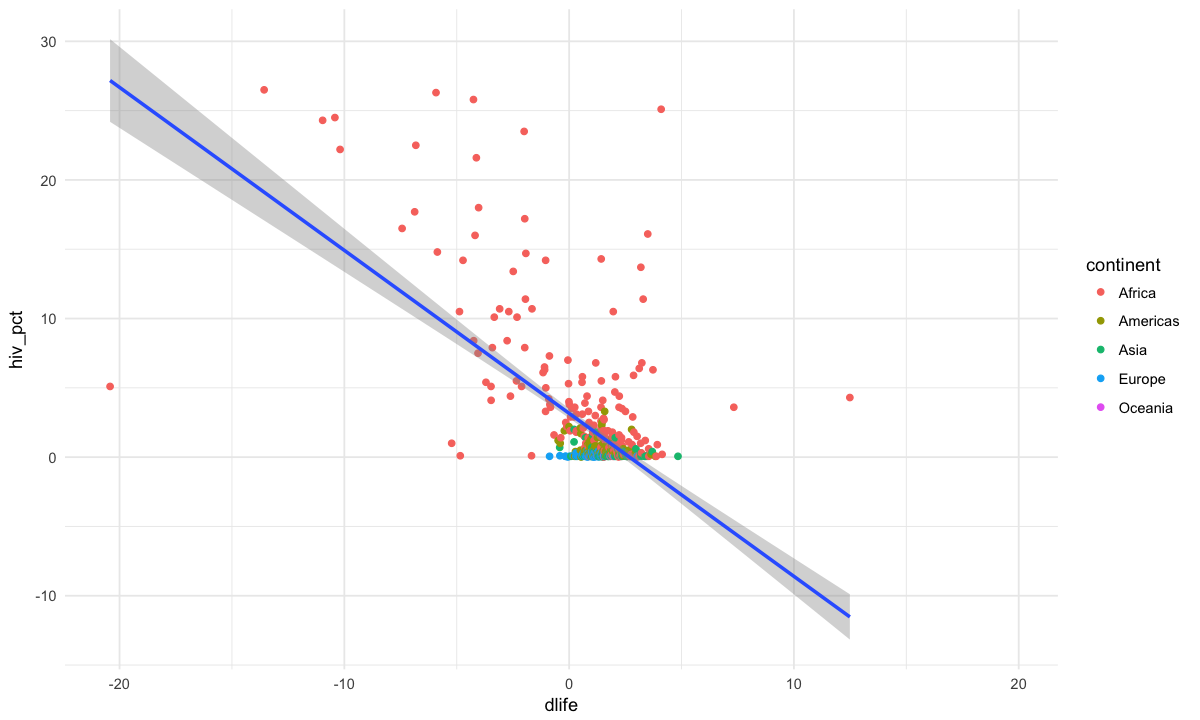

In [118]:
hiv_dlife = dlife %>% ungroup %>% mutate(year = make_date(year), dlife) %>%
    left_join(hiv)
ggplot(hiv_dlife, aes(dlife, hiv_pct)) + geom_point(aes(color = continent)) + 
    geom_smooth(method="lm")

Let us try and quantify this relationship using a linear model:

In [120]:
hiv_gap = gapminder %>% mutate(year = make_date(year)) %>% left_join(hiv)
mod = lm(lifeExp ~ hiv_pct , hiv_gap)
mod %>% summary

Joining, by = c("country", "year")
Warning message:
“Column `country` joining factor and character vector, coercing into character vector”


Call:
lm(formula = lifeExp ~ hiv_pct, data = hiv_gap)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.932  -7.472   2.710   8.158  18.676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  67.7930     0.5112  132.61   <2e-16 ***
hiv_pct      -1.4239     0.1036  -13.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.2 on 480 degrees of freedom
  (1222 observations deleted due to missingness)
Multiple R-squared:  0.2825,	Adjusted R-squared:  0.281 
F-statistic:   189 on 1 and 480 DF,  p-value: < 2.2e-16


This says that a 1% increase in the HIV infection percentage leads to a decreased life expectancy of -1.4 years, on average. However, there is a potential problem with this regression fit. To see it, let's look at residuals:

Warning message:
“Removed 1348 rows containing missing values (geom_point).”

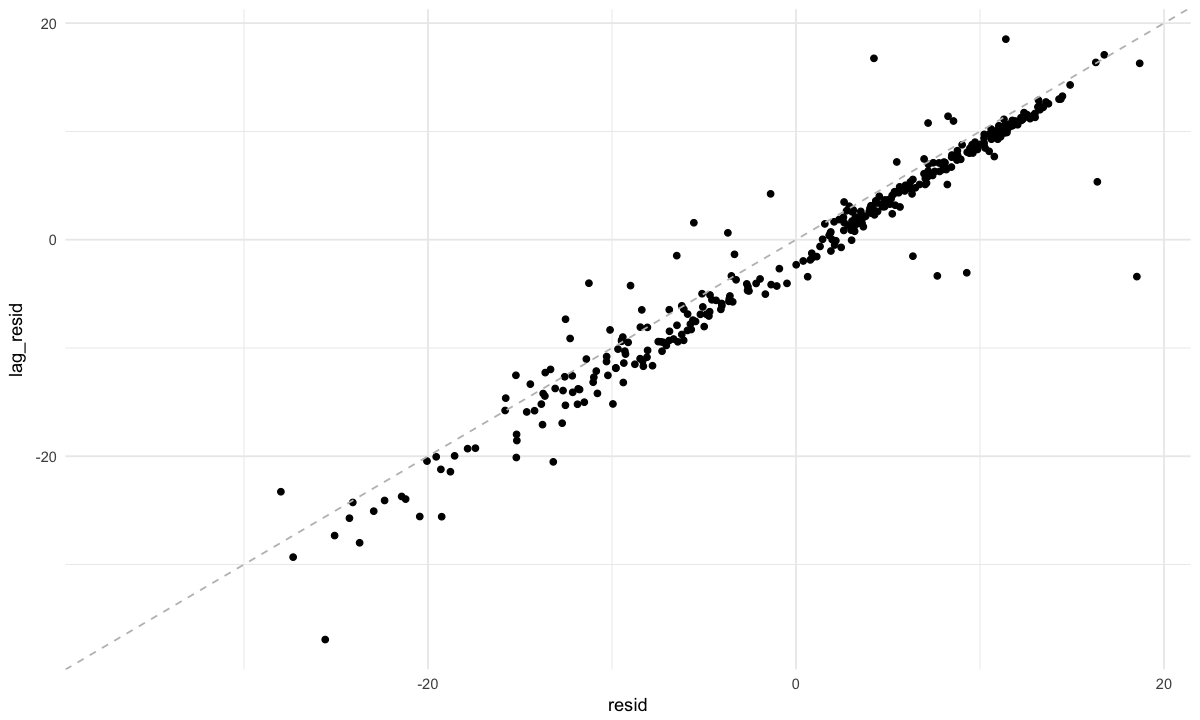

In [33]:
hiv_gap %>% add_residuals(mod) %>% group_by(country) %>% arrange(country, year) %>% 
            mutate(lag_resid = lag(resid)) %>% ggplot(aes(resid, lag_resid)) + geom_point() + 
            geom_abline(slope = 1, linetype = "dashed", colour = "grey")

The linear model assumes that the residuals are *uncorrelated*, whereas here the correlation between each residual and its lag is close to 1. There are a few ways to address this. One is to look at the first-differences model:

In [34]:
hiv_gap_2 = gapminder %>% mutate(year = make_date(year)) %>% left_join(hiv) %>% 
    arrange(country, year) %>% mutate(dlife = c(NA, diff(lifeExp)))
mod = lm(dlife ~ hiv_pct, hiv_gap_2)
mod %>% summary

Joining, by = c("country", "year")
Warning message:
“Column `country` joining factor and character vector, coercing into character vector”


Call:
lm(formula = dlife ~ hiv_pct, data = hiv_gap_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.4101  -0.5790  -0.1276   0.6275  12.2501 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.57571    0.09228   17.08   <2e-16 ***
hiv_pct     -0.31111    0.01869  -16.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.841 on 480 degrees of freedom
  (1222 observations deleted due to missingness)
Multiple R-squared:  0.3659,	Adjusted R-squared:  0.3645 
F-statistic: 276.9 on 1 and 480 DF,  p-value: < 2.2e-16


The interpretation of this regression is now different. It says that a one point increase in the HIV percentage causes the 5-year change in life expectancy to decrease by -.31 years.

If we again compare residuals, they look much more like random noise:

Warning message:
“Removed 1348 rows containing missing values (geom_point).”

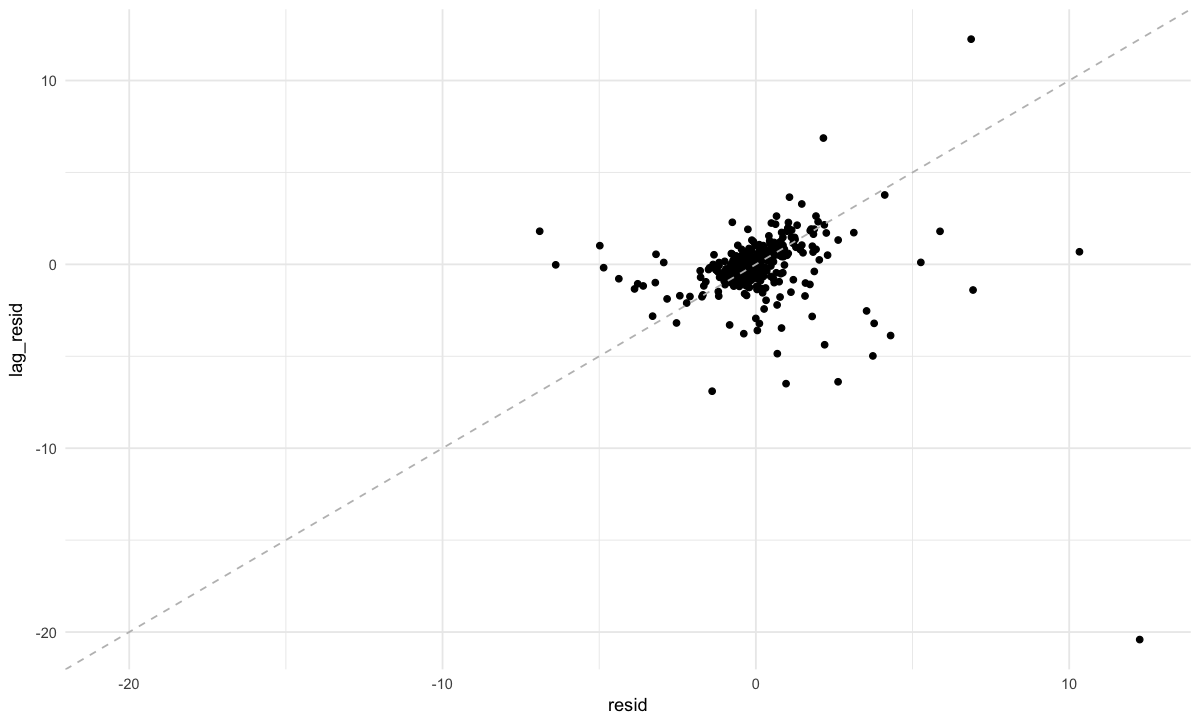

In [35]:
hiv_gap_2 %>% add_residuals(mod) %>% group_by(country) %>% arrange(country, year) %>% 
              mutate(lag_resid = lag(resid)) %>% ggplot(aes(resid, lag_resid)) + geom_point() + 
              geom_abline(slope = 1, linetype = "dashed", colour = "grey")

Let us explore a few ways to improve this model. We might think that more than just the past year of HIV data is relevant:

In [38]:
mod = lm(dlife ~ hiv_pct + lag(hiv_pct), hiv_gap_2)
mod %>% summary


Call:
lm(formula = dlife ~ hiv_pct + lag(hiv_pct), data = hiv_gap_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3703 -0.5662 -0.1323  0.5452 11.6424 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.58362    0.09160  17.289  < 2e-16 ***
hiv_pct      -0.60125    0.04297 -13.992  < 2e-16 ***
lag(hiv_pct)  0.36222    0.04839   7.486 5.72e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.558 on 353 degrees of freedom
  (1348 observations deleted due to missingness)
Multiple R-squared:  0.5237,	Adjusted R-squared:  0.521 
F-statistic: 194.1 on 2 and 353 DF,  p-value: < 2.2e-16


Looking back at the original scatter plot, we also see some countries where the HIV infection rate does not seem to substantially affect life expectancy. We suspect this is due to these countries being richer, and having a more developed public health system:

Warning message:
“Removed 1348 rows containing missing values (geom_point).”

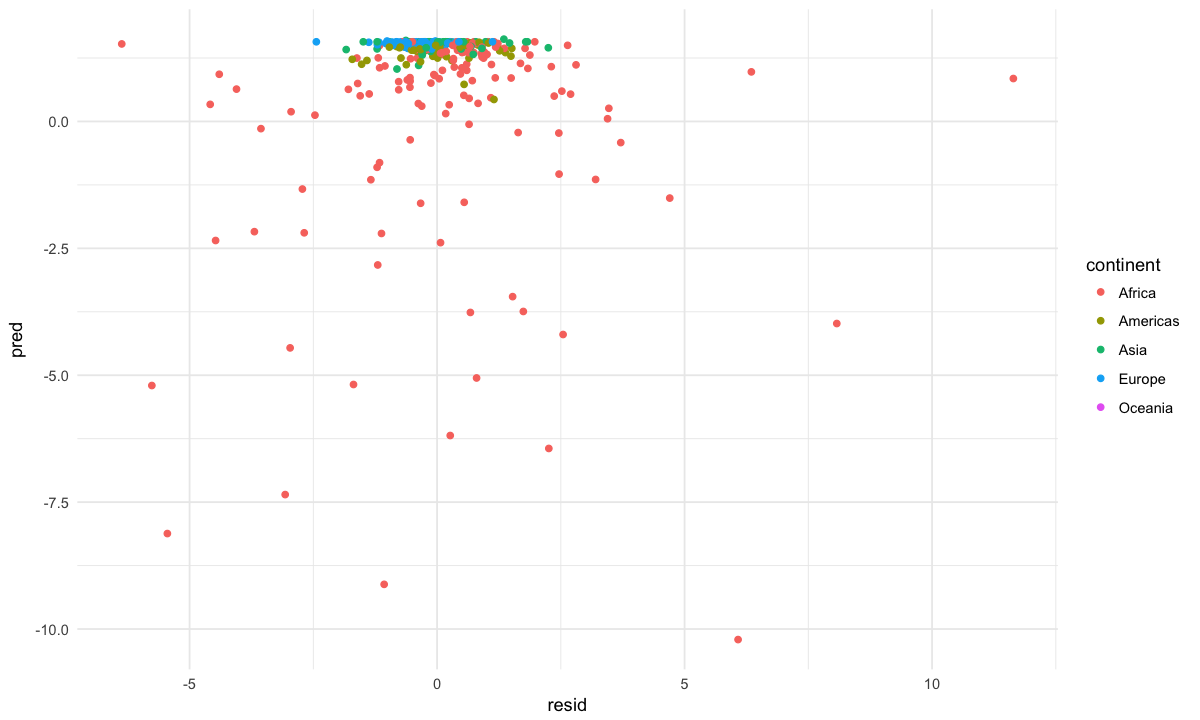

In [39]:
hiv_gap_2 %>% add_residuals(mod) %>%  add_predictions(mod) %>% 
    ggplot(aes(resid, pred, color = continent)) + geom_point()

Let us try adding an interaction term for Africa:

In [40]:
mod = lm(dlife ~ I(continent == "Africa") * hiv_pct, hiv_gap_2)
mod %>% summary


Call:
lm(formula = dlife ~ I(continent == "Africa") * hiv_pct, data = hiv_gap_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.6065  -0.5306  -0.0666   0.5264  12.0341 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            1.3922     0.1319  10.557   <2e-16 ***
I(continent == "Africa")TRUE           0.5041     0.2121   2.377   0.0178 *  
hiv_pct                               -0.1655     0.2314  -0.715   0.4747    
I(continent == "Africa")TRUE:hiv_pct  -0.1699     0.2323  -0.732   0.4648    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.834 on 478 degrees of freedom
  (1222 observations deleted due to missingness)
Multiple R-squared:  0.3734,	Adjusted R-squared:  0.3694 
F-statistic: 94.93 on 3 and 478 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1222 rows containing missing values (geom_point).”

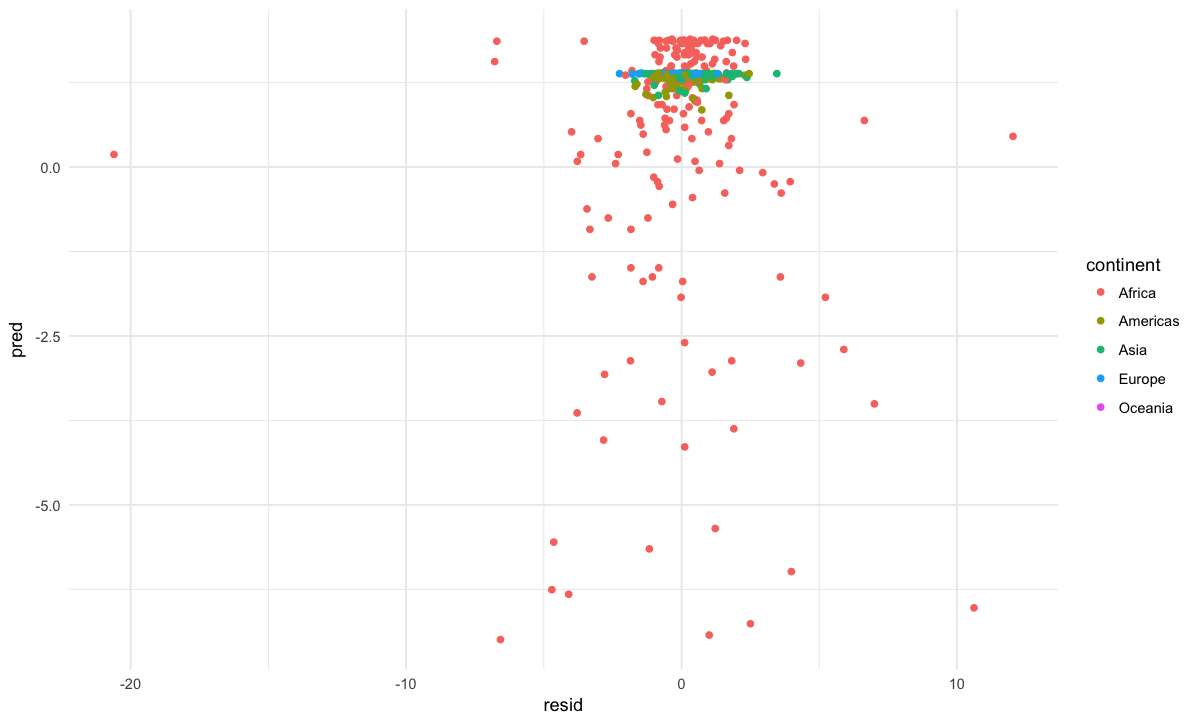

In [41]:
hiv_gap_2 %>% add_residuals(mod) %>%  add_predictions(mod) %>% 
              ggplot(aes(resid, pred, color = continent)) + geom_point()

In [42]:
mod = lm(dlife ~ gdpPercap * hiv_pct, hiv_gap_2)
mod %>% summary


Call:
lm(formula = dlife ~ gdpPercap * hiv_pct, data = hiv_gap_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.4645  -0.5281   0.0214   0.4935  12.1539 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.936e+00  1.265e-01  15.302  < 2e-16 ***
gdpPercap         -3.281e-05  8.057e-06  -4.072 5.45e-05 ***
hiv_pct           -3.748e-01  2.620e-02 -14.307  < 2e-16 ***
gdpPercap:hiv_pct  1.151e-05  4.415e-06   2.606  0.00944 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.809 on 478 degrees of freedom
  (1222 observations deleted due to missingness)
Multiple R-squared:  0.3902,	Adjusted R-squared:  0.3864 
F-statistic:   102 on 3 and 478 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1222 rows containing missing values (geom_point).”

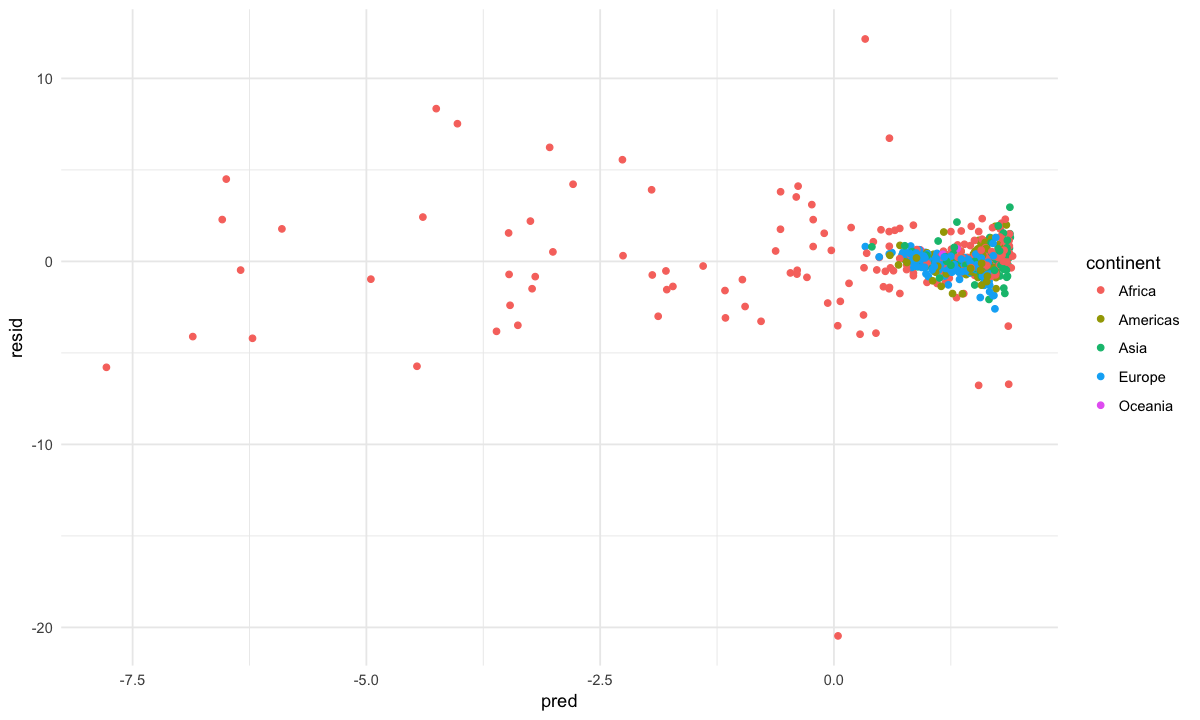

In [43]:
hiv_gap_2 %>% add_residuals(mod) %>%  add_predictions(mod) %>% 
              ggplot(aes(pred, resid, color = continent)) + geom_point()

One thing that is obvious in these plots is that the error variance is different for different continents:

Warning message:
“Removed 1222 rows containing non-finite values (stat_boxplot).”

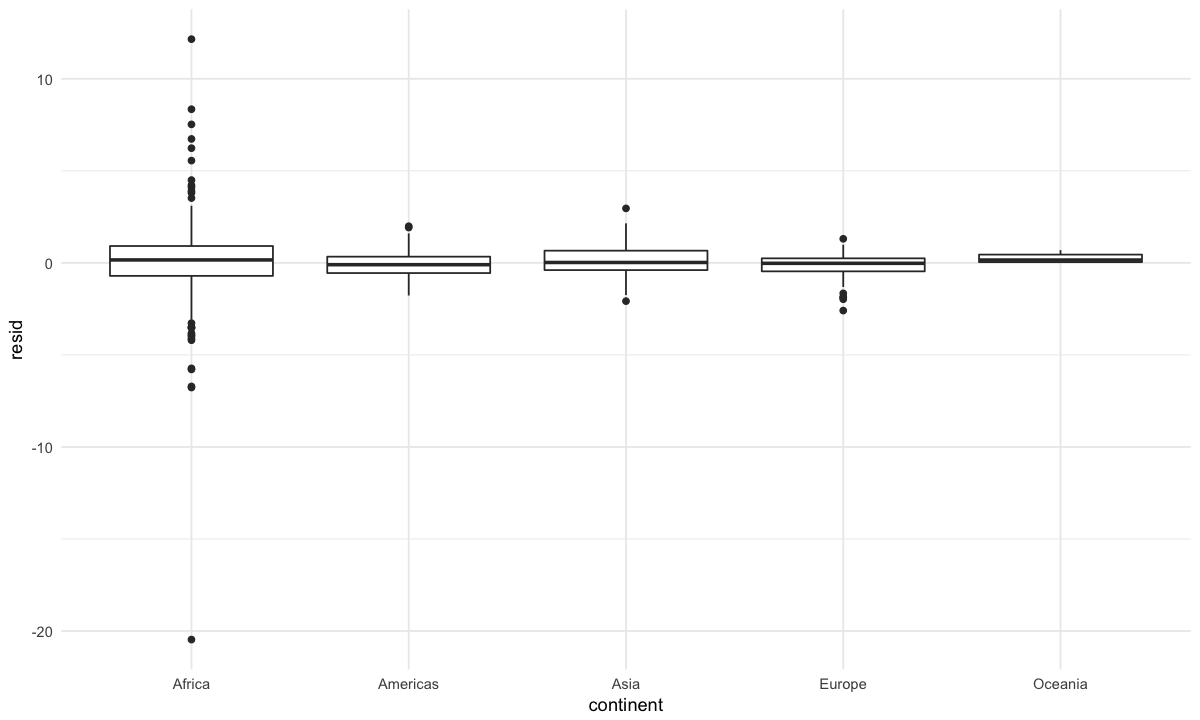

In [44]:
hiv_gap_2 %>% add_residuals(mod) %>% ggplot(aes(continent, resid)) + geom_boxplot()

Another option for dealing with autocorrelated data is to explicitly model the autocorrelation. 

In [45]:
library(nlme)
head(hiv_gap_2)
mod = gls(lifeExp ~ I(continent == "Africa") * hiv_pct * gdpPercap, data = hiv_gap_2, 
          na.action = na.omit, 
          correlation = corAR1())
summary(mod)

Warning message:
“package ‘nlme’ was built under R version 3.4.4”
Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



  country     continent year       lifeExp pop      gdpPercap hiv_pct dlife
1 Afghanistan Asia      1952-01-01 28.801   8425333 779.4453  NA         NA
2 Afghanistan Asia      1957-01-01 30.332   9240934 820.8530  NA      1.531
3 Afghanistan Asia      1962-01-01 31.997  10267083 853.1007  NA      1.665
4 Afghanistan Asia      1967-01-01 34.020  11537966 836.1971  NA      2.023
5 Afghanistan Asia      1972-01-01 36.088  13079460 739.9811  NA      2.068
6 Afghanistan Asia      1977-01-01 38.438  14880372 786.1134  NA      2.350

Generalized least squares fit by REML
  Model: lifeExp ~ I(continent == "Africa") * hiv_pct * gdpPercap 
  Data: hiv_gap_2 
       AIC      BIC    logLik
  2792.876 2834.488 -1386.438

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.6487573 

Coefficients:
                                                   Value Std.Error   t-value
(Intercept)                                     66.70822 0.8248988  80.86837
I(continent == "Africa")TRUE                   -14.96181 0.9809491 -15.25239
hiv_pct                                         -1.24493 1.1346017  -1.09724
gdpPercap                                        0.00043 0.0000418  10.38811
I(continent == "Africa")TRUE:hiv_pct             0.83670 1.1401359   0.73386
I(continent == "Africa")TRUE:gdpPercap           0.00120 0.0001835   6.53477
hiv_pct:gdpPercap                                0.00001 0.0001235   0.11367
I(continent == "Africa")TRUE:hiv_pct:gdpPercap  -0.00006 0.0001250  -0.51332
                  

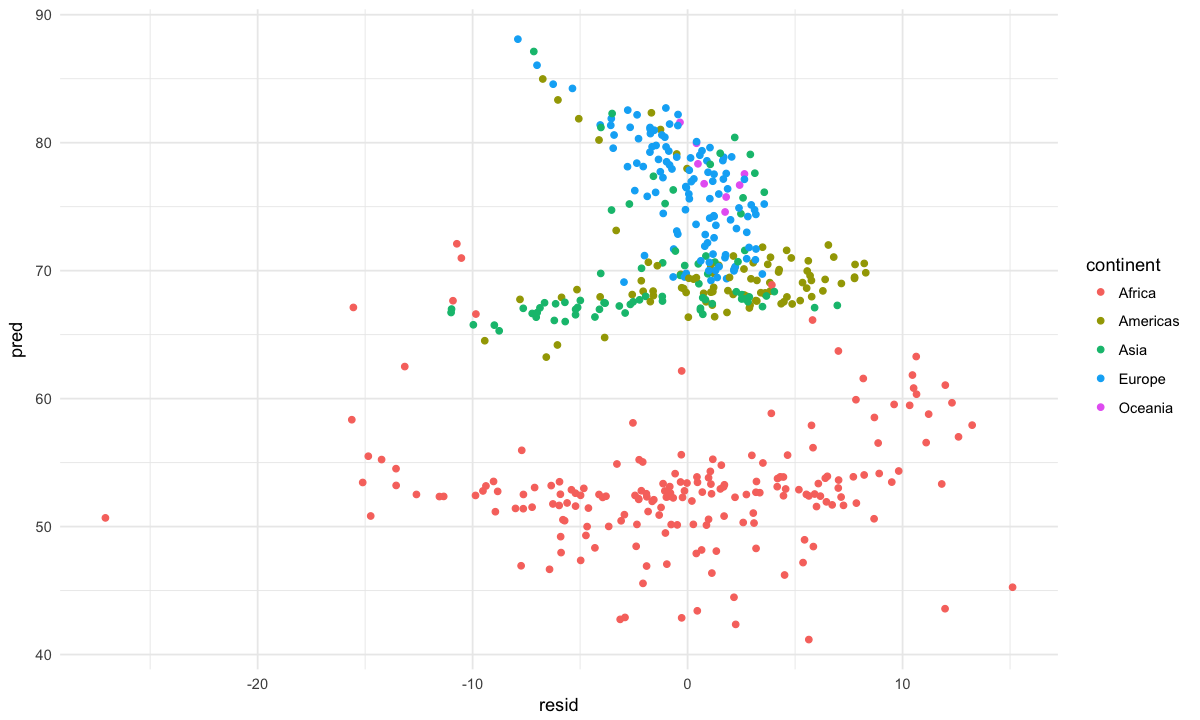

In [46]:
hiv_gap_2 %>% na.omit %>% add_residuals(mod) %>% add_predictions(mod) %>% 
              ggplot(aes(resid, pred, color = continent)) + geom_point() +
              geom_abline(slope=1)